# **Clustering Amazon Reviews of Viva Naturals Organic Extra Virgin Coconut Oil**

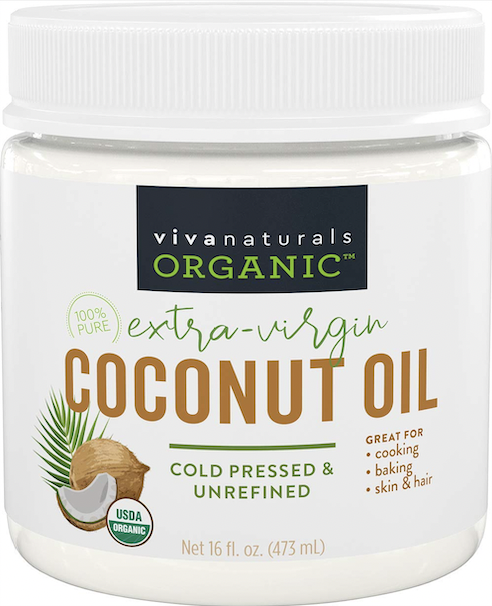

# Executive Summary

There are thousands of products being sold on Amazon. In order to be successful, a product has to have good reviews. New buyers of a product typically rely on the reviews before they make a purchase.

On the other hand, prevalently negative reviews of a product can deter potential cusomers from making additional purchases of the product.

It is therefore imperative that a seller knows what customers are saying about their product in order to generate the most sales and keep complaints to a minimum.

For this study, we chose to analyze the reviews of the "Viva Naturals Organic Extra Virgin Coconut Oil, 16 Ounce" being sold on Amazon. The group chose this product for the number of reviews that it received. This study specifically analyzes and discusses this product but the analytical method can be applied to any other product being sold on any other e-commerce site.

The study focuses on the 5-star and 1-star ratings of the aforementioned product because the group wanted to find out what makes the product sell well and conversely, what are the negative feedback being mentioned about the product.

The analysis uses data from Amazon.com for the reviews. The data was pre-processed and the group performed EDA on the dataset in order to familiarize themselves with the data. For the data clean-up, the group coverted the reviews to lower-case, dropped stop words, performed lemmatization and removed single character words. The analysis proper involves the use of Latent Semantic Analysis (LSA) with Singular Value Decomposition (SVD) and Term Frequency Inverse Document Frequency (TF-IDF). The results were then clustered using agglomerative clusering with Ward's method. A word cloud was also used to provide texture to the previous results.

The results of the clutering is as follows:

For the 1-star ratings, 2 clusters were formed.

The first cluster is dominated by the following words: smell, liquid, use, hair, try, solid and one. There are other words which are not as dominant such as leak, skin, rancid and review.

The group analyzed this result and hypothesizes that this cluster is mostly talking about the product becoming liquefied instead of being a solid. There are also some references to the smell being rancid. There are also references to hair and skin which the product is probably used for.

The second cluster is dominated by the following words: smell, use, open, and rancid. Other references include make, hair, cooking.

The group hypothesizes that this second cluster predominantly talks about the product smelling rancid and was already open when delivered. There is also reference to hair and to a lesser degree cooking.

Based on the 1-star reviews, these are mostly customers who intended to use the product on their hair and skin. The two most prevalent complaints are the following: Firstly, the product has been become liquified. Secondly, the product smells bad, rancid, like cheese. These issues were probably due to defects in packaging that led to leaks and the product being opened. Another cause for the defects could be the storage facility or delivery was bad that it caused the product to liqeufy or to be opened. 

For the 5-star ratings, since there were more ratings than the 1-star ratings, 6 clusters were formed.

The first cluster is mostly about great.

The second cluster is mostly about excellent.

The third cluster is about great, taste, use, and cooking. This cluster refers to how great the product is for cooking.

The fourth cluster, for the most part, refers to good, hair, use, smell, love and skin. This cluster talks mostly about how the product is great for the hair and skin. The smell is also referred to.

The fifth cluster is mostly about good.

The last cluster is mostly love.

Based on the 5-star reviews, we can draw theories from clusters 3 and 4. The customers who rated the product well use the product mostly for their hair, skin and for cooking. The customers who use the product for their hair and skin like the smell and feel of the product. While the people who use the product for their cooking like the taste. Clusters 1, 2, 5 and 6 do not produce much insight on their own.

As a product manager for the product, Viva Naturals Extra-Virgin Coconut Oil, they can use the results of this cluster to continue to satisfy their customers who use it for their hair, skin and cooking. The product manger would also do well to look at their packaging, delivery and storage facilities. Most of their poor reviews are due to the packaging being compromised and thus sacrifcing the quality of the product. The product can also use this and see if they can push other uses for their product. A cursory search on the internet indicates that Extra-Virgin coconut oil can also be used for health and for dental hygiene. Identifying new uses for their product can boost sales.

In conclusion, this analysis of this one product on Amazon, can serve as a reference study on how clustering can help product managers and owners determine what their customers like and don't like about their products. It also helps to identify what customers are saying about their product.

While the study focuses on this product, the application of the study can be applied to e-commerce sites, restaurants, hotels, air-bnb, to name a few examples. But practically, any product or service that has reviews can make use of this analysis.

Furthermore, this study analyzes what the clusters reveal about what the customers are saying. A product manager can also use these clusters and determine if the company's marketing campaigns have an impact on their customer base. If, for example, the company is pushing a promotion and the promotion is not showing up in the clusters, it could mean that the campaign is not as effective. 

Clearly, this analysis will have many practical uses in various industries and fields.

# Problem Statement

Analyze the customer reviews of a product being sold on Amazon using agglomerative clustering with Ward's method in order to determine how customers perceive the product.

These are some of the questions the group hopes to answer: What are the good things customers are saying about this product? What are the bad things customers are saying about this product?



# Motivation

In order to improve their product, sellers must gain insight on the positive and negative things their customers are saying about it. Clustering both positive and negative reviews will allow sellers to group feedback easily and create more targeted enhancements of their product.

Based on the results of the study, sellers can make changes to how they sell, market and brand their products in order to push sales and revenues. They can also use these reviews to identify the areas that they need to improve on.

The results of the study can possibly reveal effectiveness of marketing campaigns. By studying what customers are saying, sellers can validate if their marketing campiagns are reaching their customers.

# Data Description

The Amazon reviews dataset contains information on product reviews by customers from the website `amazon.com` spanning from 2013-09-22 to 2015-08-31. The dataset used in this study consists of reviews from the category "Grocery".

The dataset contains the following information:

1. Product characteristics - these correspond to the columns `marketplace`, `product_id`, `product_category`, `product_parent` and `product_title`
2. Customer reviews - these correspond to the columns `review_date`, `review_id`, `customer_id`, `star_rating`, `review_headline`, `review_body`, `helpful_votes`, `total_votes`, `vine` and `verified_purchase`.

In [83]:
# import libraries
import pandas as pd
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pickle
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA

# read file
df = pd.read_csv('df_vco.csv')

# first ten records from the dataset
(print("""
                                         Figure 1: Amazon Grocery Reviews"""))
df.head(5)


                                         Figure 1: Amazon Grocery Reviews


marketplace  customer_id       review_id  product_id  product_parent  \
0          US       440599  R3324U33MZ6XP9  B00DS842HS       552852355   
1          US      5497793  R32EFRDFM474JP  B00DS842HS       552852355   
2          US     33339391   RXPC9TS62O8IO  B00DS842HS       552852355   
3          US     28365852  R36EQ3IULQP2T6  B00DS842HS       552852355   
4          US     21851354   RVLYJETDO4TK2  B00DS842HS       552852355   

                                       product_title product_category  \
0  Viva Naturals Organic Extra Virgin Coconut Oil...          Grocery   
1  Viva Naturals Organic Extra Virgin Coconut Oil...          Grocery   
2  Viva Naturals Organic Extra Virgin Coconut Oil...          Grocery   
3  Viva Naturals Organic Extra Virgin Coconut Oil...          Grocery   
4  Viva Naturals Organic Extra Virgin Coconut Oil...          Grocery   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0          4.0            0.0          0.0    N                 Y   
1          5.0            0.0          1.0    N                 Y   
2          3.0            0.0          1.0    N                 Y   
3          5.0            0.0          0.0    N                 Y   
4          5.0            0.0          0.0    N                 Y   

                             review_headline  \
0                                 Four Stars   
1  and smells great. I use it for everything   
2                   Didn't work as I thought   
3                     I love the consistancy   
4                    I love this coconut oil   

                                         review_body review_date  
0                              mmmmm....tasty! Great  2015-08-31  
1  Tastes, and smells great. I use it for everyth...  2015-08-31  
2  my purpose for buying this was to use on the b...  2015-08-31  
3  This is the first time I've used Viva Labs coc...  2015-08-31  
4  I love this coconut oil.  I have been cooking ...  2015-08-31

# Methodology

                                       Figure 2: Flowchart of the Methodology

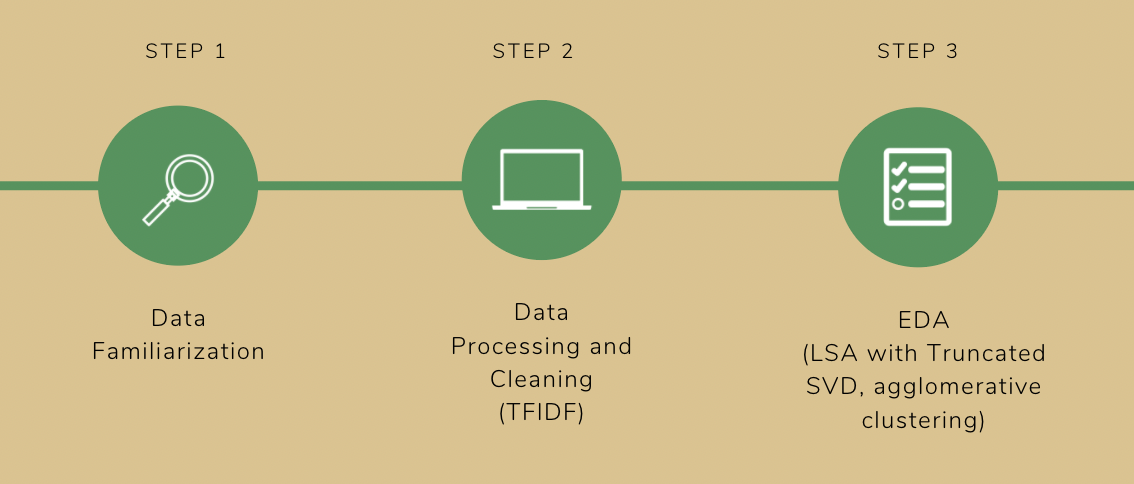

**Data Familiarization**

The group began data familiarization by inspecting the Amazon reviews dataset, specifically for the product "Viva Naturals Organic Extra Virgin Coconut Oil, 16 Ounce". The scope was set to cover reviews of this product that corresponded to a 5 star rating or a 1 star rating, in order to capture the strong positive or negative reactions of customers.

**Data processing**

From the complete dataset of Amazon reviews, a subset was created containing information only on "Viva Naturals Organic Extra Virgin Coconut Oil, 16 Ounce" for 1 star ratings and 5 star ratings. Text cleaning was then done on the `reviews_body` column and a TF-IDF matrix was created to be used in Latent Semantics Analysis. Text cleaning involved coverting the text to lowercase, removing stop words and lemmatizing the text.

**Exploratory Data Analysis**

We first inspected the trend for all review counts for ""Viva Naturals Organic Extra Virgin Coconut Oil, 16 Ounce" over time. We then drilled down to see the trend of review counts for 1 star reviews and 5 star reviews. We then used the `review_body` column to create a word cloud to come up with a high level view of the commonly used words for 1 star and 5 star reviews. We then implemented Latent Semantic Analysis and Truncated SVD on the TF-IDF matrix to reduce its dimensions. Finally, agglomerative clustering using Ward's method was performed on the reduced matrix to uncover any clusters for 1 star and 5 star reviews.


# Data Processing

**Creating CSV files from Amazon Reviews**

The group created a csv file `df_vco.csv` containing only information on the product "Viva Naturals Organic Extra Virgin Coconut Oil, 16 Ounce". From this, a csv file `df1.csv` was created containing reviews that gave a 1-star rating, and another `df5.csv` containing reviews that gave a 5-star rating. To generate visualizations, `df_review_count.csv` was created containing information on the number of total reviews through time. Another csv file `df_rating_time.csv`, was also created containing information on number of total reviews by rating through time. Details of this can be viewed in `01 Creating Subset From Amazon Reviews.ipynb`.


The following preprocessing steps were done for both datasets to convert the text reviews into an easily analyzable form. Details of this can be viewed in `02 Data Processing - 1 star.ipynb` and `03 Data Processing - 5 star.ipynb`.

**Converting reviews to pandas Series**

A pandas series was created containing the reviews from the column `review_body`. Each element of this series corresponded to one review made by a customer. This column was chosen over the column `review_headline` because it contained the more detail on the sentiments of the customers. 

**Null values**

The dataset for this product did not contain any null values for any column.

**Converting to lowercase**

This series was converted to lowercase for consistency. This allowed words with different capitalizations to be counted as the same word. 

**Extracting words**

All words were extracted from each review using regex. This removed punctuation marks or other characters that did not contribute to understanding the topic of the review.

**Removing stop words and single characters**

Stop words and single characters were removed from each review to decrease noise and conserve space in our dataset. It was important to remove commonly used words so more focus can be given to the rarer, more important words. The NLTK (Natural Language Toolkit) was used to access a list of stop words.

**Lemmatization**

Lemmatization was used to transform words into their root word. This allowed the corpus of words to be more uniform, so that words such as "better" and "good" may be counted as the same word.

**Latent Semantic Analysis**

In order to perform Latent Semantic Analysis (LSA) we imported `TfidfVectorizer()` from `sklearn.feature_extraction.text` and used the Term Frequency Inverse Document Frequency (TF-IDF) algorithm to find the keywords for each review. We used the parameter `ngram_range=(1,2)` so both single words and phrases composed of two words could be accounted for, we will refer to these as "terms". Using the corpus of terms from all reviews, a Compressed Sparse Row matrix was created containing the TF-IDF weights. This contained data on each review (also called a document), and terms that was present in the corpus. A higher TF-IDF weight meant that a term had a high frequency in the document but a low frequency in the corpus and was therefore rarer and suitable as a document keyword. A pickle file `tfidf_tokenized_1.pickle` was created from the Compressed Sparse Row matrix for 1 star reviews, and another `tfidf_tokenized_5.pickle` for 5 star reviews.

Once we had created the TF-IDF matrix, we could perform dimensionality reduction, resulting in a better set of features. Because the TF-IDF matrix is a sparse matrix, LSA is most suited to be used as a dimensionality reduction technique. Truncated Singular Value Decomposition (SVD) was used to retain only the most significant dimensions. By plotting the cumulative variance explained, we were able to determine the number of singular vectors (SV) to be retained in order to have a 100% variance explained. For 1 star reviews the number was 154 and for 5 star reviews this number was 1000.

**Agglomerative Clustering**

After performing dimensionality reduction on the TF-IDF matrix, the results were clustered using agglomerative clustering with Ward's method. Each review was then mapped to the results of this clustering. For both 1 star and 5 star reviews, a word cloud was used to visualize the most frequent words occuring in each of their clusters.

# Exploratory Data Analysis

## Reviews over Time

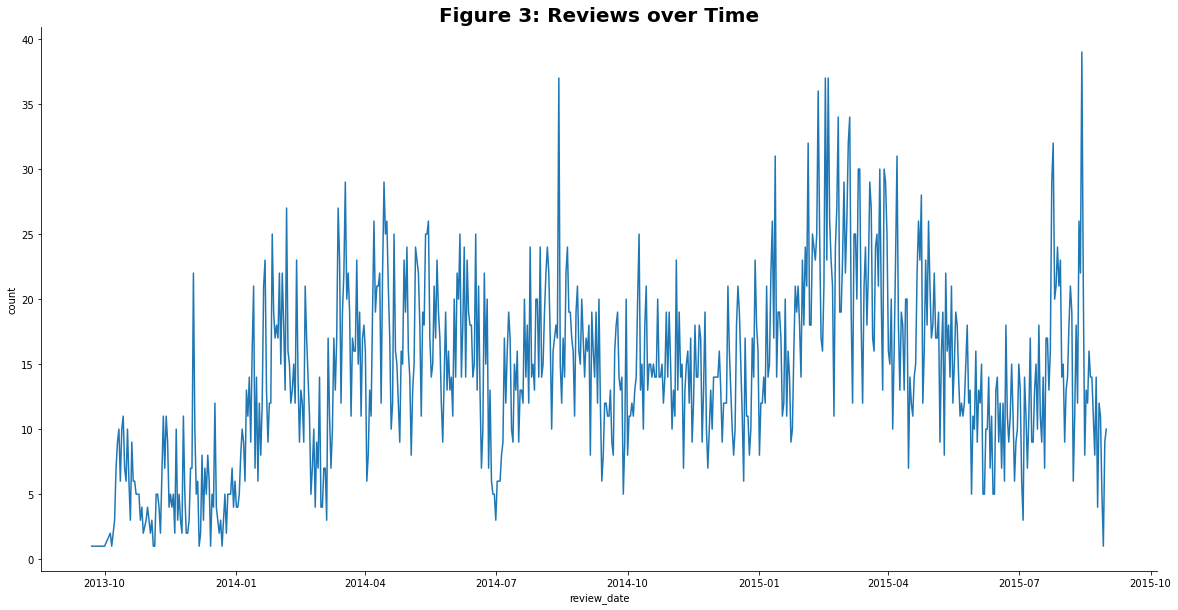

In [84]:
# generate lineplot for reviews over time
df.review_date = pd.to_datetime(df.review_date)
df_review_count = (df.groupby('review_date')['review_id']
                   .count().to_frame().reset_index())
df_review_count = df_review_count.rename(columns={'review_id':'count'})
df_review_count.to_csv('df_review_count.csv', index=False)

plt.figure(figsize=(20,10))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Figure 3: Reviews over Time', ha='center', fontsize=20,
          weight='bold')
sns.lineplot(data=df_review_count, x='review_date', y='count');

These are the number of reviews collected over a 2 year period. There are some spikes that can be seen. While no interpretation can be made on this, it provides more details for the EDA.


## Reviews over Time by Rating

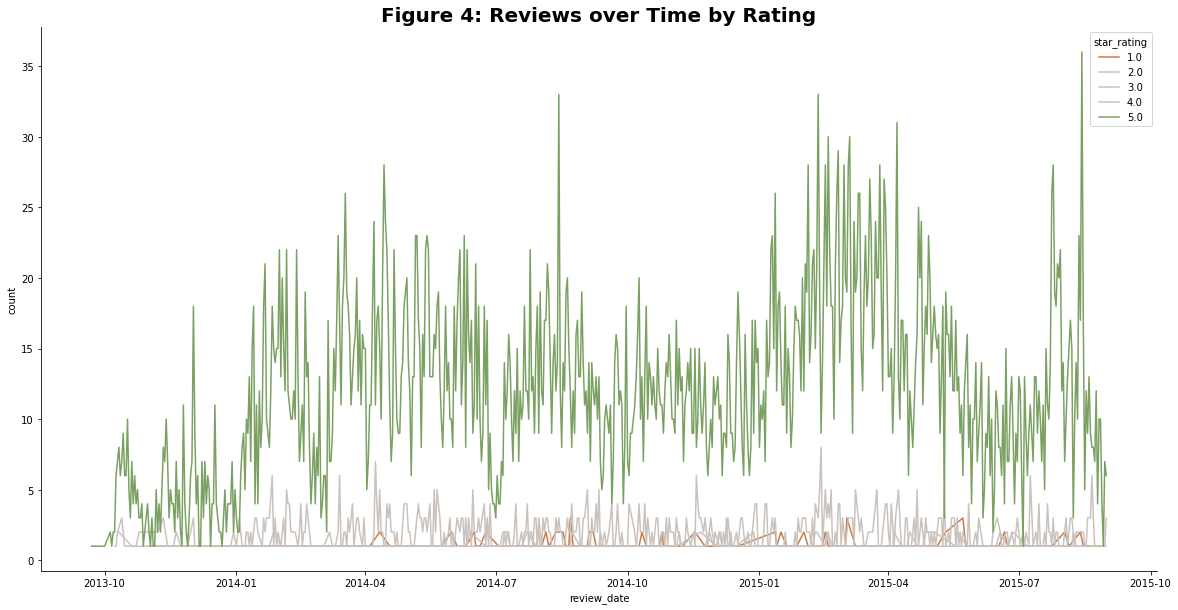

In [85]:
# generate lineplot for reviews over time by rating
df = pd.read_csv('df_vco.csv')
df.review_date = pd.to_datetime(df.review_date)
df_rating_time = (df.groupby(['review_date', 'star_rating'])['review_id']
                  .count().to_frame().reset_index())
df_rating_time = df_rating_time.rename(columns={'review_id':'count'})
df_rating_time.to_csv('df_rating_time.csv', index=False)

plt.figure(figsize=(20,10))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Figure 4: Reviews over Time by Rating', ha='center', fontsize=20,
          weight='bold')
sns.lineplot(data=df_rating_time, x='review_date', y='count',
             hue='star_rating', palette=['#C67A47', '#CAC2BD', '#CAC2BD',
                                         '#CAC2BD', '#7AA162']);

These are the reviews over a two year period, grouped according to the number of stars given in the review. The product has garnered mostly 5 star ratings although there are a number of 1 star ratings as well. There is no discernible pattern that can be derived here.

## Word Cloud Visualization

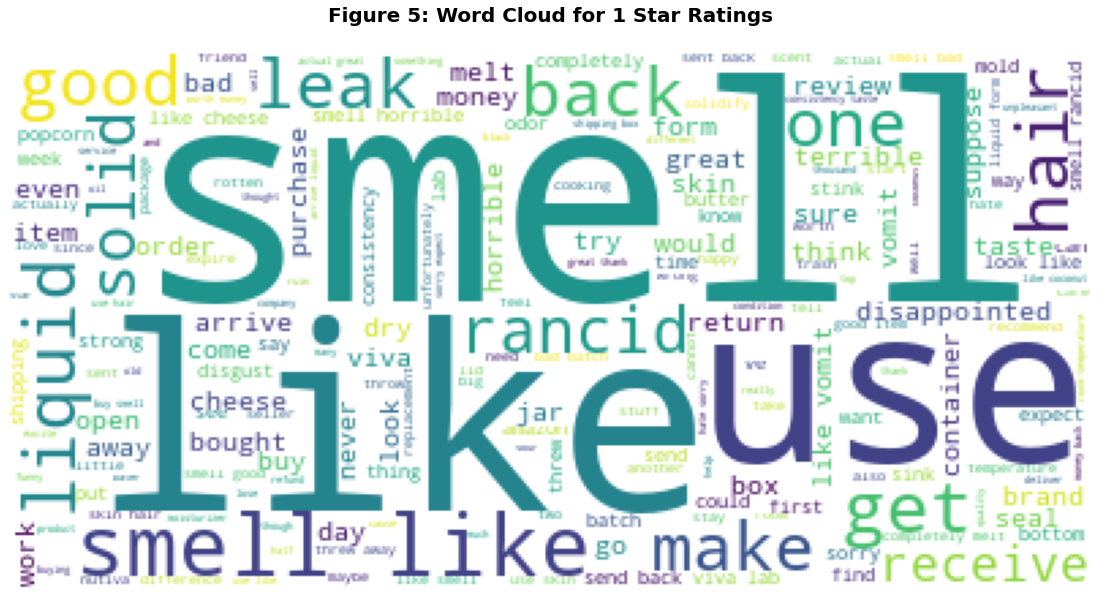

In [86]:
# Create a wordcloud to provide a preview of what to expect in the analysis
df_words_1star = pd.read_csv('df_words_1star.csv')
df_cloud = df_words_1star.transpose()
wordcloud = WordCloud(background_color='white').generate_from_frequencies\
            (df_cloud.sum(axis = 1))
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.set_title('Figure 5: Word Cloud for 1 Star Ratings', ha='center', 
             fontsize=20,
          weight='bold', pad=30)
plt.axis('off')
plt.imshow(wordcloud);

The most prominent words in the 1 star rating reviews are the words smell, like, use, liquid, leak, good, solid, hair, back, rancid. While the words seem interesting, since there is a lack of context, the exact meaning is difficult to derive. This is especially true since there are contradicting words such as good and terrible.

However, this word cloud is useful as a validation for other visualizations.

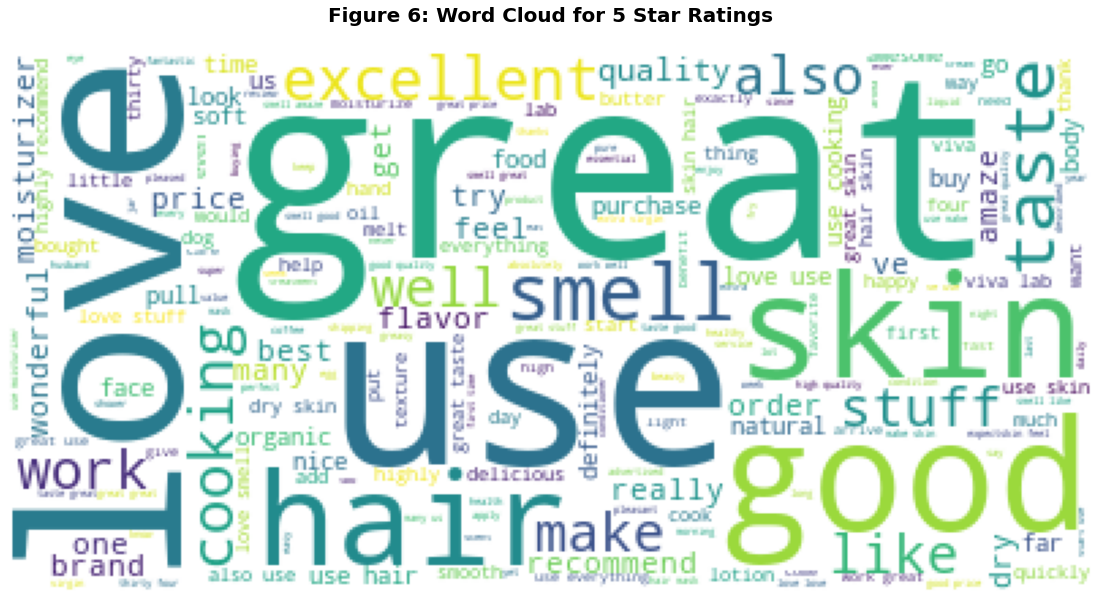

In [87]:
# Create a wordcloud to provide a preview of what to expect in the analysis
df_words_5star = pd.read_csv('df_words_5star.csv')
df_cloud = df_words_5star.transpose()
wordcloud = WordCloud(background_color='white').generate_from_frequencies\
            (df_cloud.sum(axis = 1))
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.set_title('Figure 6: Word Cloud for 5 Star Ratings', ha='center', 
             fontsize=20,
          weight='bold', pad=30)
plt.axis('off')
plt.imshow(wordcloud);

The most prominent words for the 5 star ratings are great, use, love, excellent, good, skin, hair. Again, the context and the use of the words is difficult to guess but we can guess that it is primarily positive since there are no conflicting negative words.

This will be useful to validate other visualizations.

## Dimensionality Reduction

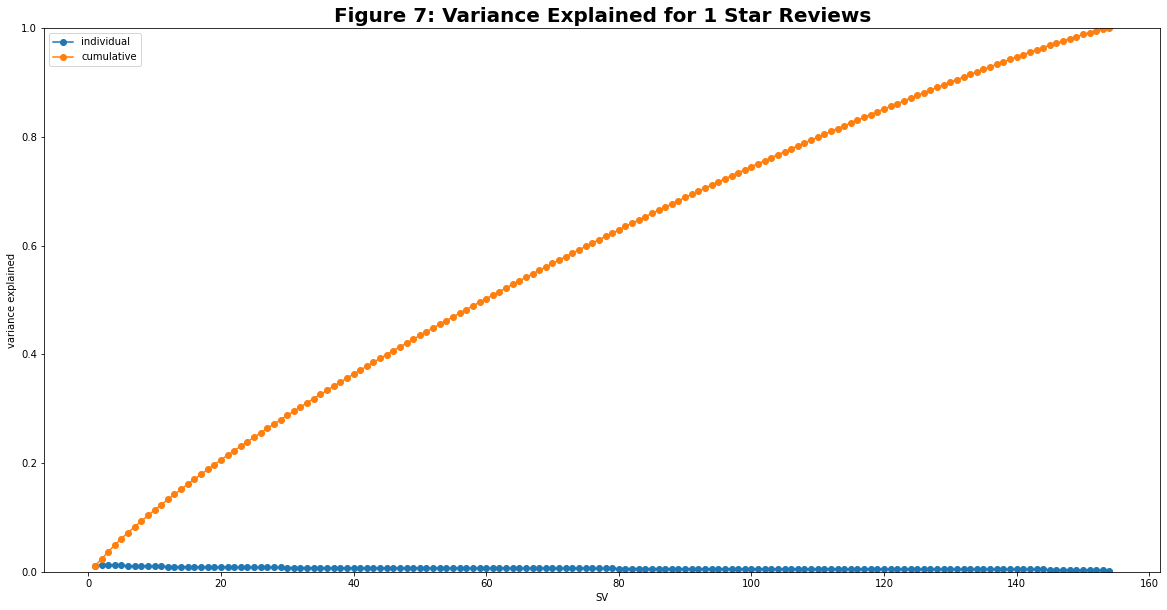

In [88]:
# open pickled matrix
with open('tfidf_tokenized_1.pickle', 'rb') as f:
    tfidf_tokenized = pickle.load(f)

# perform truncated SVD with ideal number of SV's to retain for 1 stars
svd_model = TruncatedSVD(n_components=154)
svd_model.fit(tfidf_tokenized)
svd_results_1star = svd_model.fit_transform(tfidf_tokenized)
ve = svd_model.explained_variance_ratio_

# plot cumulative explained variance
fig, ax = plt.subplots(figsize=(20,10))
ax = plt.gca()
plt.title('Figure 7: Variance Explained for 1 Star Reviews', ha='center',
          fontsize=20, weight='bold')
ax.plot(range(1, len(ve)+1), ve, 'o-', label='individual')
ax.plot(range(1, len(ve)+1), ve.cumsum(), 'o-', label='cumulative')
ax.legend()
ax.set_ylim(0, 1)
ax.set_xlabel('SV')
ax.set_ylabel('variance explained');

From the above plot, we determine the number of SV's to retain for 100% variance explained is 154.

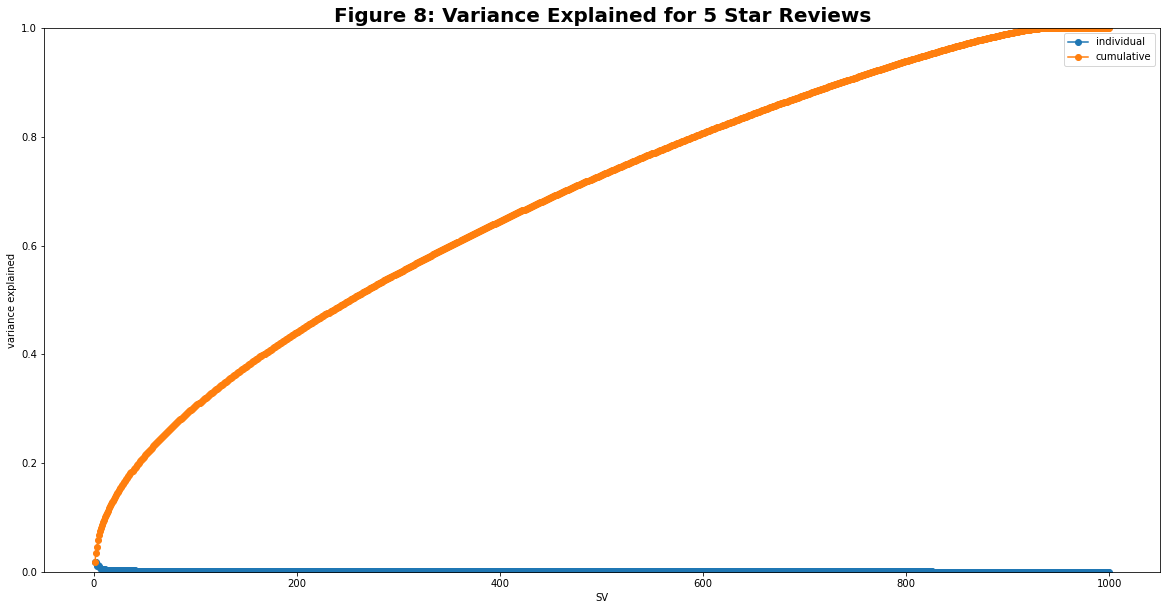

In [89]:
# open pickled matrix
with open('tfidf_tokenized_5.pickle', 'rb') as f:
    tfidf_tokenized = pickle.load(f)

# perform truncated SVD with ideal number of SV's to retain for 5 stars
svd_model = TruncatedSVD(n_components=1000)
svd_model.fit(tfidf_tokenized)
svd_results_5star = svd_model.fit_transform(tfidf_tokenized)
ve = svd_model.explained_variance_ratio_

# plot cumulative explained variance
fig, ax = plt.subplots(figsize=(20,10))
ax = plt.gca()
plt.title('Figure 8: Variance Explained for 5 Star Reviews', ha='center',
          fontsize=20, weight='bold')
ax.plot(range(1, len(ve)+1), ve, 'o-', label='individual')
ax.plot(range(1, len(ve)+1), ve.cumsum(), 'o-', label='cumulative')
ax.legend()
ax.set_ylim(0, 1)
ax.set_xlabel('SV')
ax.set_ylabel('variance explained');

From the above plot, we determine the number of SV's to retain for 100% variance explained is 1000.

## Dendograms for Agglomerative Clustering using Ward's method

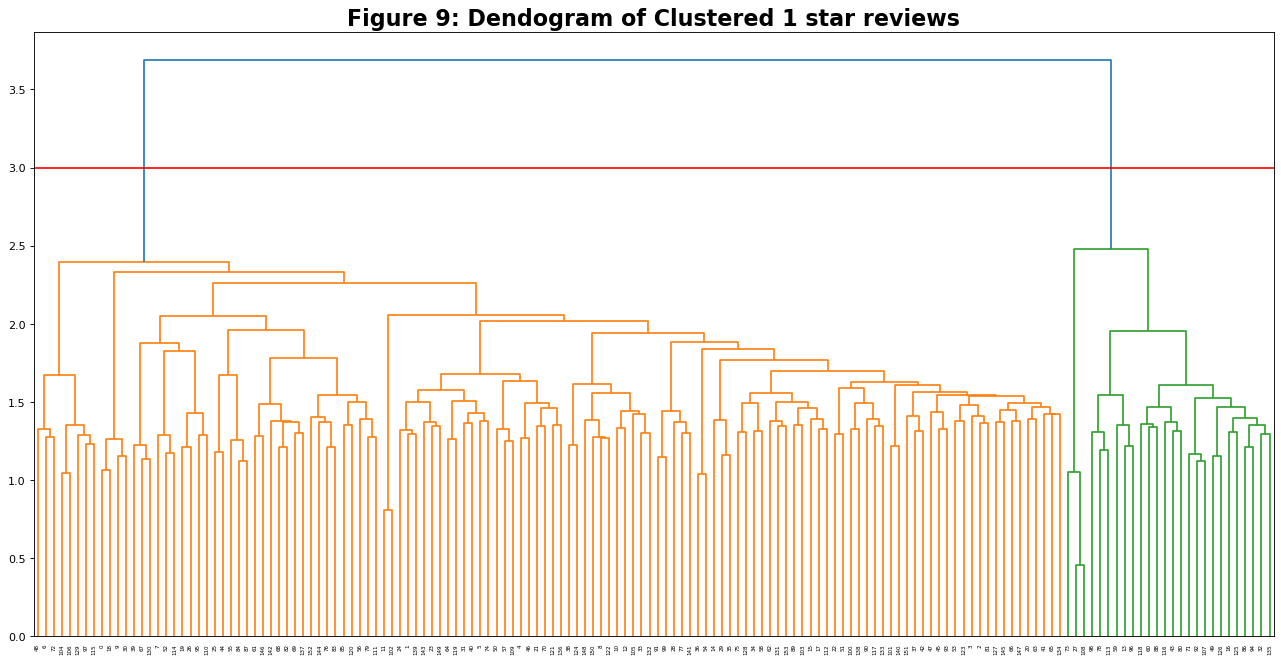

In [90]:
# perform clustering on reduced matrix and display dendogram
dist_1star = 1 - cosine_similarity(svd_results_1star)
mergings_1star = linkage(dist_1star, method="ward", metric='euclidean')

plt.figure(figsize=(20,10), dpi=80)
plt.title('Figure 9: Dendogram of Clustered 1 star reviews', ha='center',
          fontsize=20, weight='bold')
dendrogram(mergings_1star, p=20, truncate_mode="level", leaf_rotation=90)
plt.axhline(y=3, c='r')
plt.show()

The group chose to cut the dendogram at delta=3.0 to come up with two main clusters for the 1 star reviews.

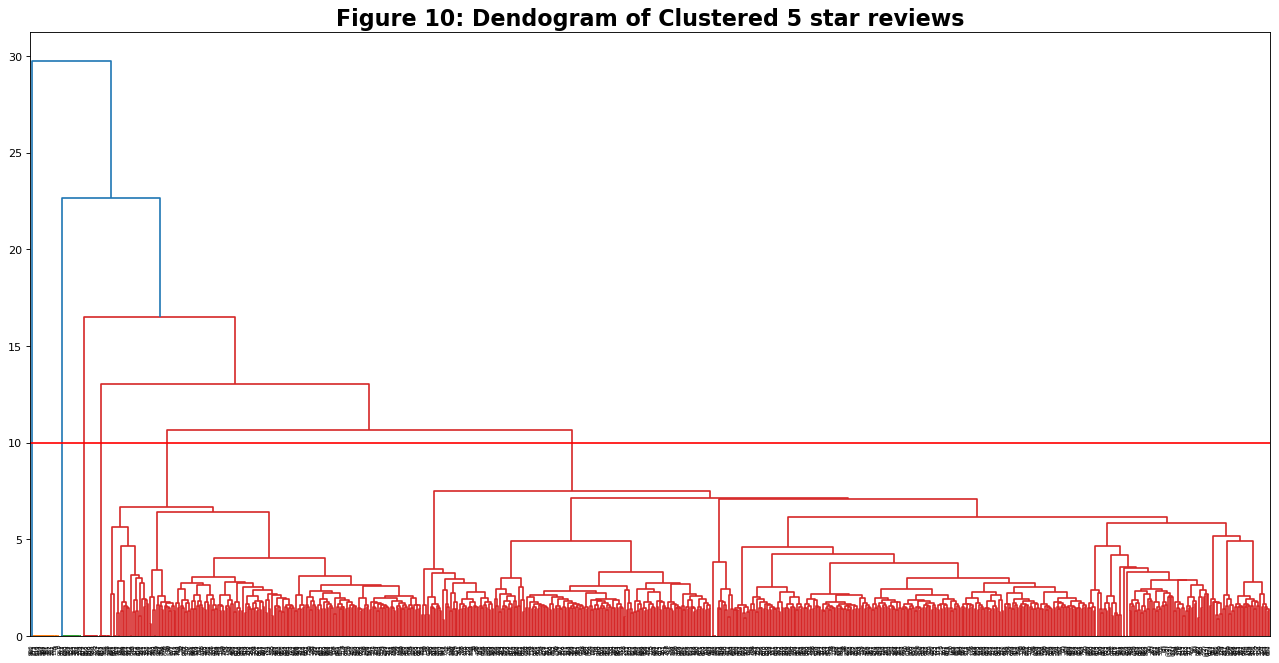

In [91]:
# perform clustering on reduced matrix and display dendogram
dist_5star = 1 - cosine_similarity(svd_results_5star)
mergings_5star = linkage(dist_5star, method="ward", metric='euclidean')

plt.figure(figsize=(20,10), dpi=80)
plt.title('Figure 10: Dendogram of Clustered 5 star reviews', ha='center',
          fontsize=20, weight='bold')
dendrogram(mergings_5star, p=20, truncate_mode="level", leaf_rotation=90)
plt.axhline(y=10, c='r')
plt.show()

The group chose to cut the dendogram at delta=10 to come up with six main clusters for the 5 star reviews.

# Scatter plot of Clusters

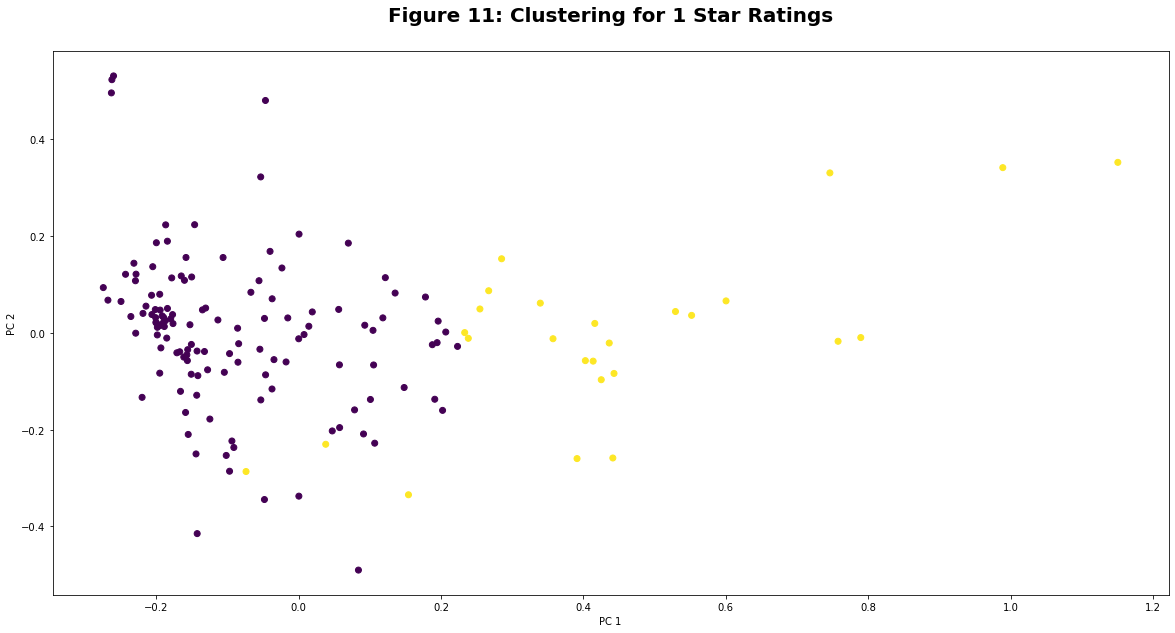

In [92]:
# visualizing clusters using top 2 PC's
Z = linkage(dist_1star, method="ward", metric='euclidean',
            optimal_ordering=True)
y_predict_Z_1star = fcluster(Z, t=3, criterion='distance')
X_res_new_1star = PCA(n_components=2, random_state=1337).fit_transform(dist_1star)

plt.figure(figsize=(20,10))
plt.scatter(X_res_new_1star[:,0], X_res_new_1star[:,1], c=y_predict_Z_1star);
ax = plt.gca()
ax.set_title('Figure 11: Clustering for 1 Star Ratings', ha='center', 
             fontsize=20, weight='bold', pad=30)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2');

From the plot above, we can see there is minimal overlap between the two clusters formed. Although, they are not balanced.

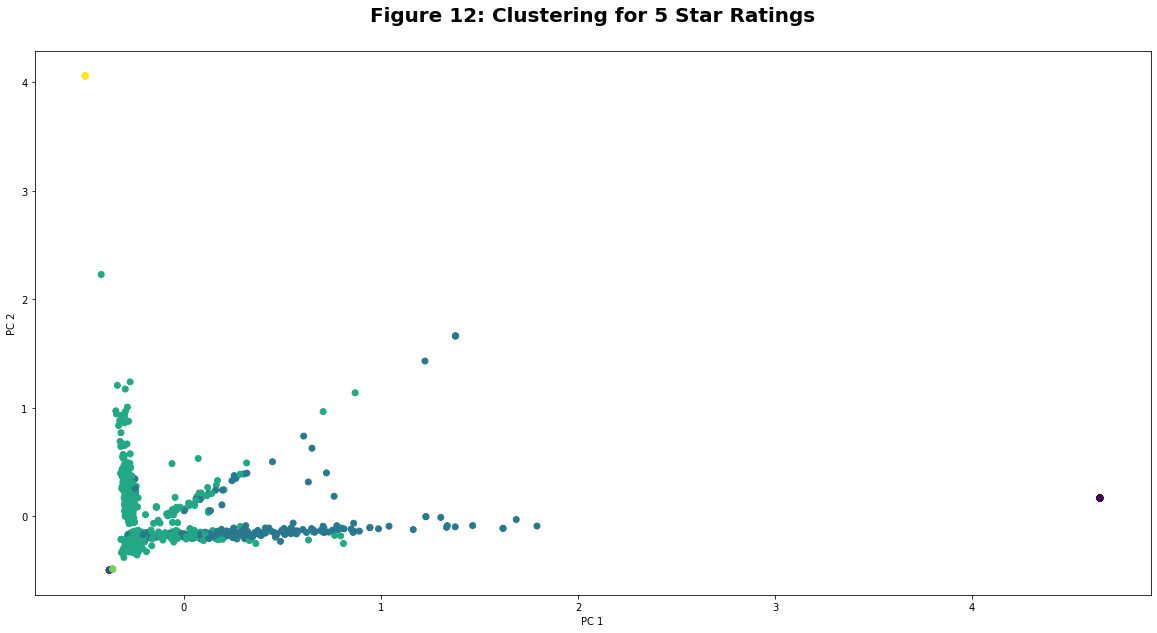

In [93]:
# visualizing clusters using top 2 PC's
Z = linkage(dist_5star, method="ward", metric='euclidean',
            optimal_ordering=True)
y_predict_Z_5star = fcluster(Z, t=10, criterion='distance')
X_res_new_5star = PCA(n_components=2, random_state=1337).fit_transform(dist_5star)

plt.figure(figsize=(20,10))
plt.scatter(X_res_new_5star[:,0], X_res_new_5star[:,1], c=y_predict_Z_5star);
ax = plt.gca()
ax.set_title('Figure 12: Clustering for 5 Star Ratings', ha='center', 
             fontsize=20, weight='bold', pad=30)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2');

From the plot above, we can see there is overlap between some clusters formed. Although, they are still well defined.

## Word Cloud per Cluster for 1 Star Reviews

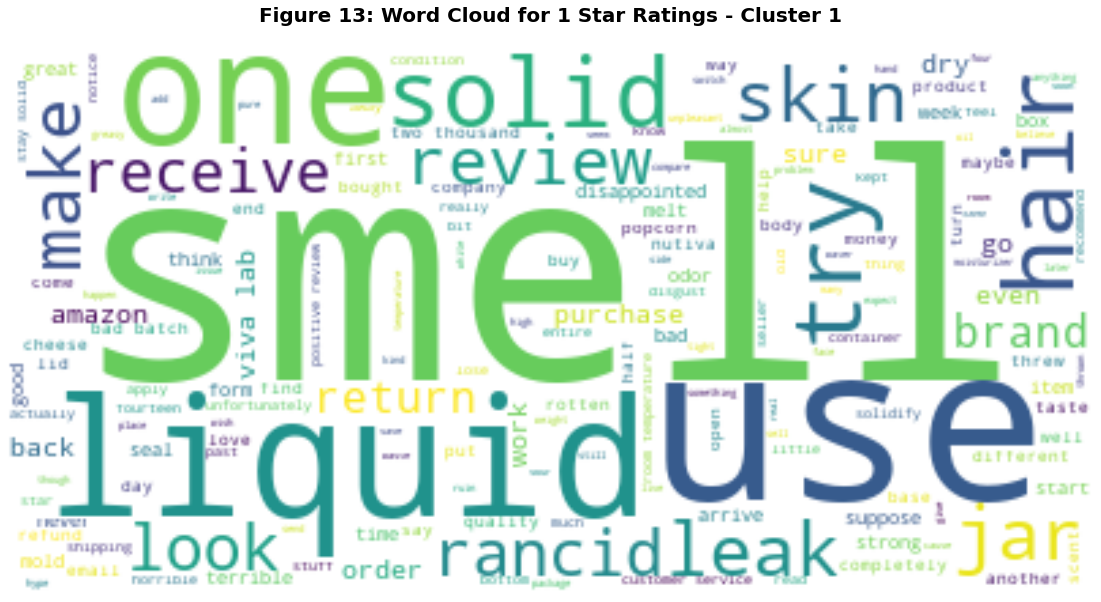

In [94]:
# create df of clusters
s = pd.read_csv ('s1.csv')
y_predict_Z_1star = pd.DataFrame(y_predict_Z_1star)

# create df of reviews
s = pd.DataFrame(s)
s.reset_index(drop=True, inplace=True)

# join df of clusters with reviews
dfnew = s.join(y_predict_Z_1star)

# rename columns
dfnew_1star = dfnew.rename(columns={dfnew.columns[1]: 'cluster'})

# generate word cloud for cluster 1
text = ''
for word in dfnew_1star.loc[(dfnew_1star['cluster']==1)].review_body:
    text = text + word
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.set_title('Figure 13: Word Cloud for 1 Star Ratings - Cluster 1', 
             ha='center', fontsize=20,
          weight='bold', pad=30)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear');

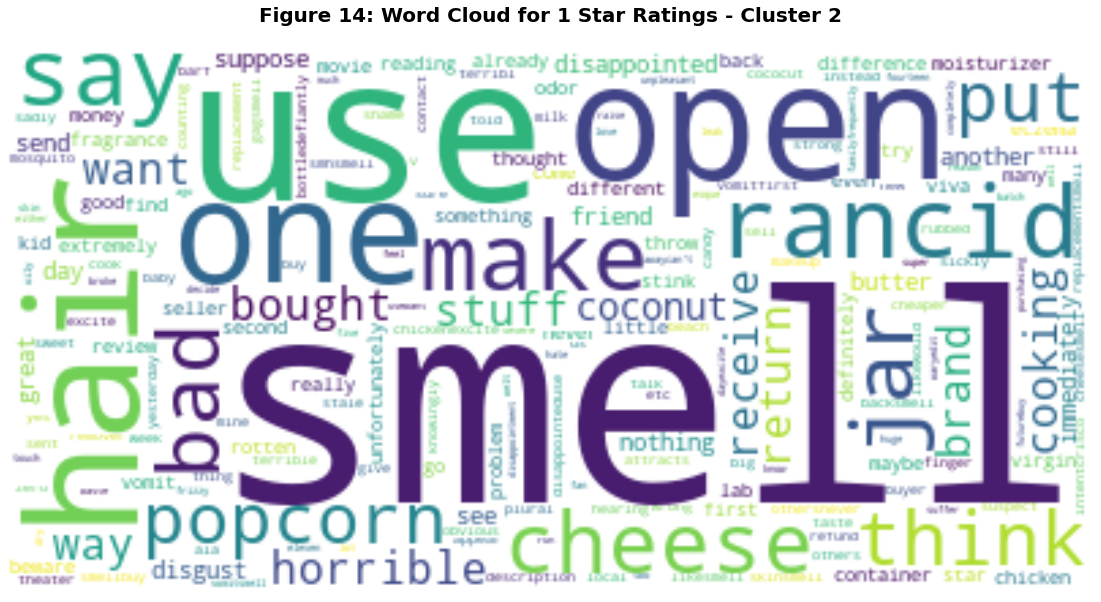

In [95]:
# generate word cloud for cluster 2
text = ''
for word in dfnew_1star.loc[(dfnew_1star['cluster']==2)].review_body:
    text = text + word
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.set_title('Figure 14: Word Cloud for 1 Star Ratings - Cluster 2', 
             ha='center', fontsize=20,
          weight='bold', pad=30)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear');

For the 1-star ratings, 2 clusters were formed.

The first cluster is dominated by the following words: smell, liquid, use, hair, try, solid and one. There are other words which are not as dominant such as leak, skin, rancid and review.

The group analyzed this result and hypothesizes that this cluster is mostly talking about the product becoming liquefied instead of being a solid. There are also some references to the smell being rancid. There are also references to hair and skin which the product is probably used for.

The second cluster is dominated by the following words: smell, use, open, and rancid. Other references include make, hair, cooking.

The group hypothesizes that this second cluster predominantly talks about the product smelling rancid and was already open when delivered. There is also reference to hair and to a lesser degree cooking.

Based on the 1-star reviews, these are mostly customers who intended to use the product on their hair and skin. The two most prevalent complaints are the following: Firstly, the product has been become liquified. Secondly, the product smells bad, rancid, like cheese. These issues were probably due to defects in packaging that led to leaks and the product being opened. Another cause for the defects could be the storage facility or delivery was bad that it caused the product to liqeufy or to be opened.


## Word Cloud per Cluster for 5 Star Reviews

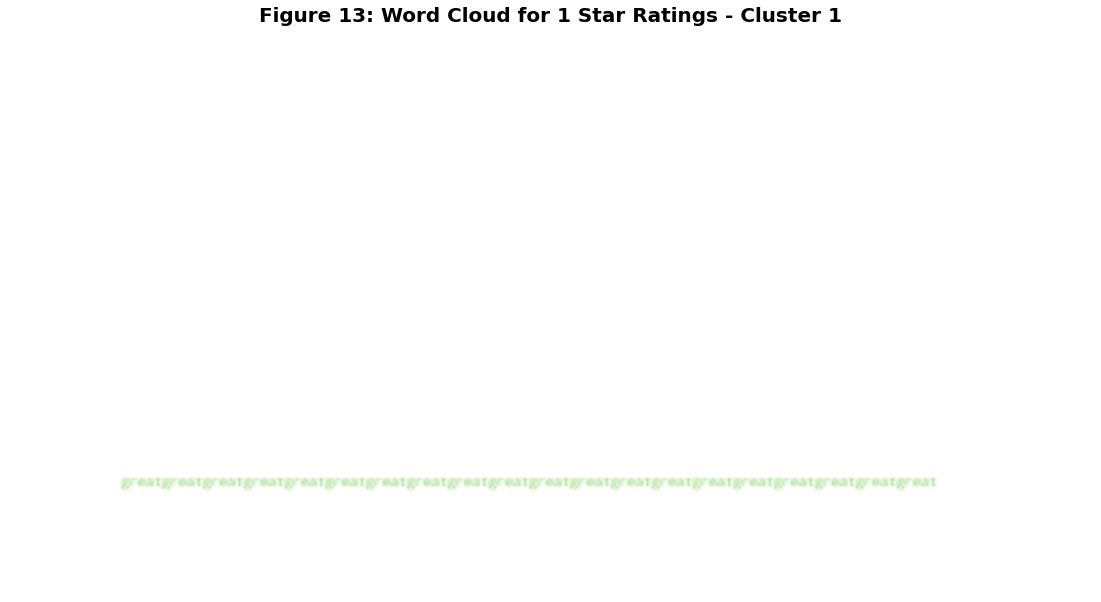

In [98]:
# create df of clusters
s = pd.read_csv('s5.csv')
y_predict_Z_5star = pd.DataFrame(y_predict_Z_5star)

# create df of reviews
s = pd.DataFrame(s)
s.reset_index(drop=True, inplace=True)

# join df of clusters with reviews
dfnew = s.join(y_predict_Z_5star)

# rename columns
dfnew_5star = dfnew.rename(columns={dfnew.columns[1]: 'cluster'})

# generate word cloud for cluster 1
text = ''
for word in dfnew_5star.loc[(dfnew_5star['cluster']==1)].review_body:
    text = text + word
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.set_title('Figure 13: Word Cloud for 1 Star Ratings - Cluster 1', 
             ha='center', fontsize=20,
          weight='bold', pad=30)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear');

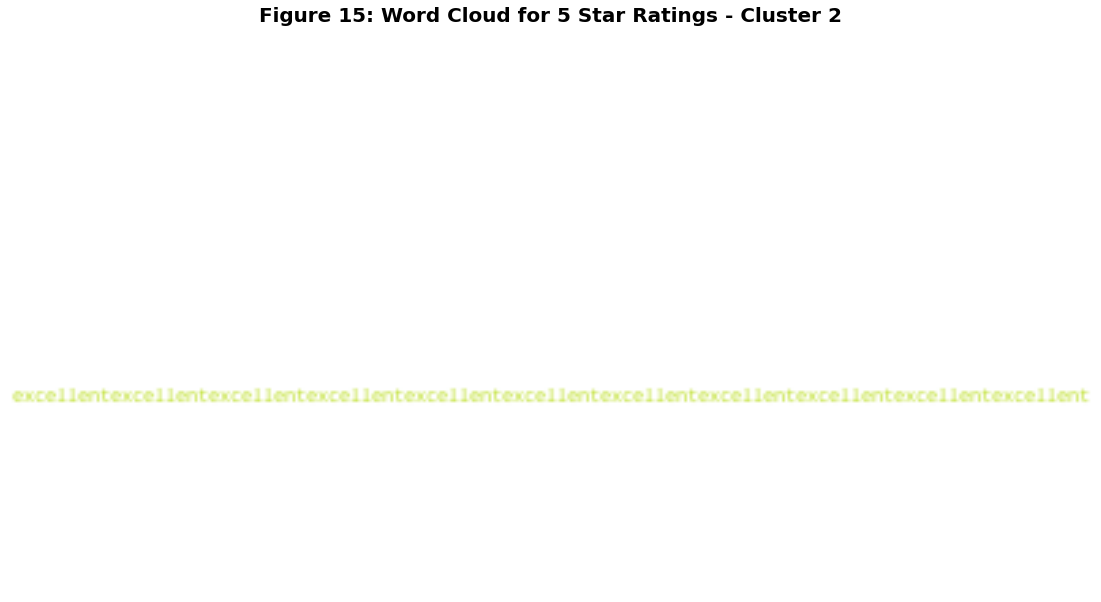

In [99]:
# generate word cloud for cluster 2
text = ''
for word in dfnew_5star.loc[(dfnew_5star['cluster']==2)].review_body:
    text = text + word
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.set_title('Figure 15: Word Cloud for 5 Star Ratings - Cluster 2', 
             ha='center', fontsize=20,
          weight='bold', pad=30)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear');

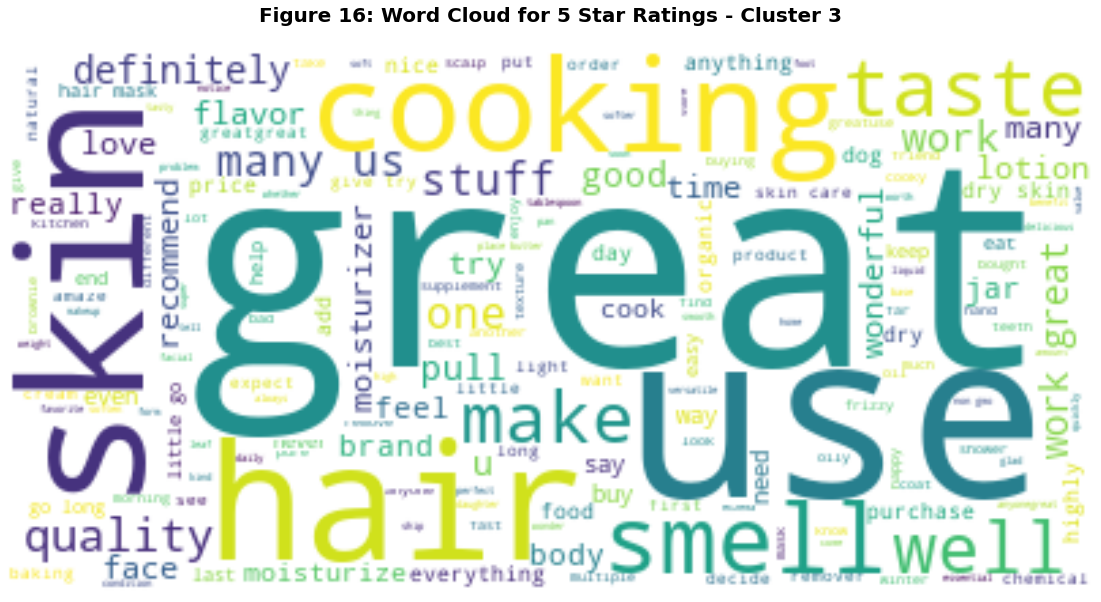

In [100]:
# generate word cloud for cluster 3
text = ''
for word in dfnew_5star.loc[(dfnew_5star['cluster']==3)].review_body:
    text = text + str(word)
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.set_title('Figure 16: Word Cloud for 5 Star Ratings - Cluster 3', 
             ha='center', fontsize=20,
          weight='bold', pad=30)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear');

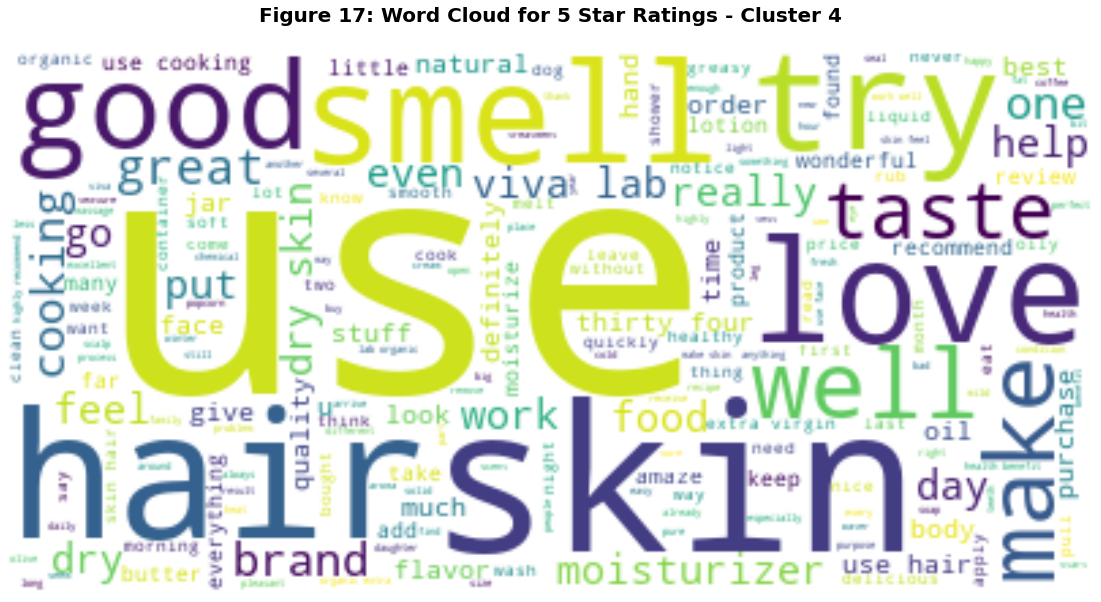

In [102]:
# generate word cloud for cluster 4
text = ''
for word in dfnew_5star.loc[(dfnew_5star['cluster']==4)].review_body:
    text = text + str(word)
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.set_title('Figure 17: Word Cloud for 5 Star Ratings - Cluster 4', 
             ha='center', fontsize=20,
          weight='bold', pad=30)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear');

For the 5-star ratings, since there were more ratings than the 1-star ratings, 6 clusters were formed.

The first cluster is mostly about great.

The second cluster is mostly about excellent.

The third cluster is about great, taste, use, and cooking. This cluster refers to how great the product is for cooking.

The fourth cluster, for the most part, refers to good, hair, use, smell, love and skin. This cluster talks mostly about how the product is great for the hair and skin. The smell is also referred to.

The fifth cluster is mostly about good.

The last cluster is mostly love.

Based on the 5-star reviews, we can draw theories from clusters 3 and 4. The customers who rated the product well use the product mostly for their hair, skin and for cooking. The customers who use the product for their hair and skin like the smell and feel of the product. While the people who use the product for their cooking like the taste. Clusters 1, 2, 5 and 6 do not produce much insight on their own.

As a product manager for the product, Viva Naturals Extra-Virgin Coconut Oil, they can use the results of this cluster to continue to satisfy their customers who use it for their hair, skin and cooking. The product manger would also do well to look at their packaging, delivery and storage facilities. Most of their poor reviews are due to the packaging being compromised and thus sacrifcing the quality of the product. The product can also use this and see if they can push other uses for their product. A cursory search on the internet indicates that Extra-Virgin coconut oil can also be used for health and for dental hygiene. Identifying new uses for their product can boost sales.

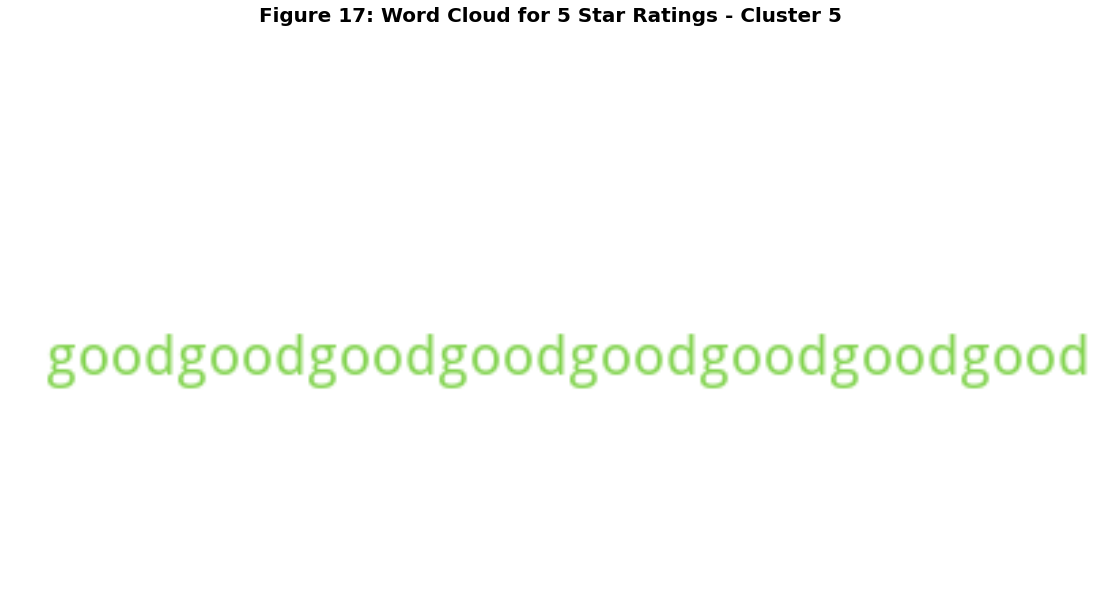

In [103]:
# generate word cloud for cluster 5
text = ''
for word in dfnew_5star.loc[(dfnew_5star['cluster']==5)].review_body:
    text = text + str(word)
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.set_title('Figure 17: Word Cloud for 5 Star Ratings - Cluster 5', 
             ha='center', fontsize=20,
          weight='bold', pad=30)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear');

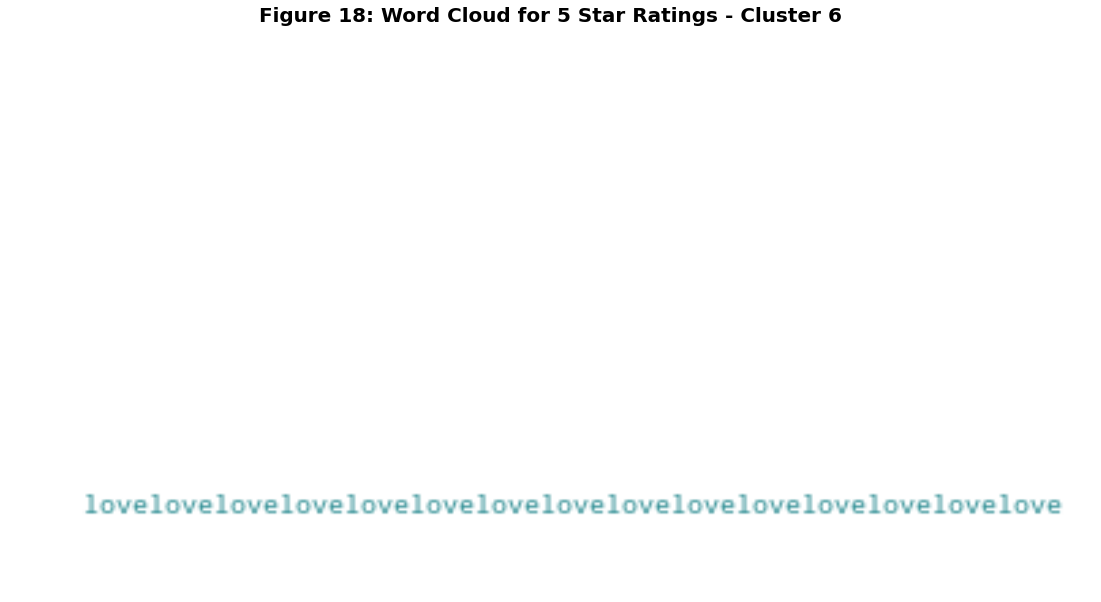

In [104]:
# generate word cloud for cluster 6
text = ''
for word in dfnew_5star.loc[(dfnew_5star['cluster']==6)].review_body:
    text = text + str(word)
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.set_title('Figure 18: Word Cloud for 5 Star Ratings - Cluster 6', 
             ha='center', fontsize=20,
          weight='bold', pad=30)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear');

# Conclusion

Based on the results of the group's analysis, Clustering is a viable solution to analyzing the contents of a products reviews.

In the product that was analyzed, Viva Naturals Extra-Virgin Coconut Oil, a lot of information regarding the use, quality and other characteristics of the 
product were revealed. In addition, a lot of information was also revealed about the product's failings, specifically about leaks, liqufication and others.


This analysis of this one product on Amazon, can serve as a reference study on how clustering can help product managers and owners determine what their customers like and don't like about their products. It also helps to identify what customers are saying about their product.

While the study focuses on this product, the application of the study can be applied to e-commerce sites, restaurants, hotels, air-bnb, to name a few examples. But practically, any product or service that has reviews can make use of this analysis.

Furthermore, this study analyzes what the clusters reveal about what the customers are saying. A product manager can also use these clusters and determine if the company's marketing campaigns have an impact on their customer base. If, for example, the company is pushing a promotion and the promotion is not showing up in the clusters, it could mean that the campaign is not as effective.

Clearly, this analysis will have many practical uses in various industries and fields.


# Recommendation

The results of this study can be further analyzed to provide more context and texture. There were two clusters that were composed of single words. Could this be a case of fake reviews?  Or are these real reviews? Finding and validating fake reviews could be the concept of another study. Fake reviews might be used by either the seller or even the competitors of the seller to give their competition negative reviews.

To enhance the study, the identified competitor of the product could also be analyzed so that the strengths and weaknesses of both products could be analyzed. The results could benefit the seller because they would know what they have to improve based on their competitor.

Also, a study on the entire product category could also be studied. This will provide unique insight on how the seller's products compare against the entire product category. This might spark revelations about how their product is unique or is not unique.

Lastly, an interesting pivot to this topic would be to analyze the trend of review topics over time. This way, we can analyze whether the product is improving in terms of reviews and whether complaints are being resolved over time. This could also be used by the marketing team to determine if their marketing campaigns are reaching the right customers and if the customers are receiving the correct messages.

# References

https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089

https://towardsdatascience.com/using-tf-idf-to-form-descriptive-chapter-summaries-via-keyword-extraction-4e6fd857d190

https://towardsdatascience.com/how-to-make-word-clouds-in-python-that-dont-suck-86518cdcb61f

https://mccormickml.com/2016/03/25/lsa-for-text-classification-tutorial/

https://towardsdatascience.com/latent-semantic-analysis-sentiment-classification-with-python-5f657346f6a3

https://towardsdatascience.com/latent-semantic-analysis-intuition-math-implementation-a194aff870f8